In [2]:
import pandas as pd
import geopy.distance
import numpy as np

In [3]:
db1 = pd.read_csv('data/finalTrain.csv')
db1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,...,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,...,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,...,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
db2=db1.copy()

In [5]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Unnamed: 10                  3638 non-null   float64
 11  Unnamed: 11                  3687 non-null   float64
 12  Time_Order_picked            45584 non-null  object 
 13  Weather_conditio

In [6]:
##db1=db1.drop(db1[10:12],axis=1)
columns_drop=db1.iloc[:,10:12]
db1.drop(columns_drop,axis=1,inplace = True)

In [6]:
db1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [7]:
db1.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
db1.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43730.0,29.566911,5.815064,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43676.0,4.633774,0.334744,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45584.0,17.017948,8.185674,-30.905562,12.933284,18.551440,22.728163,30.914057
Restaurant_longitude,45584.0,70.229684,22.885575,-88.366217,73.170000,75.897963,78.044095,88.433452
Delivery_location_latitude,45584.0,17.465480,7.335562,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45584.0,70.844161,21.120578,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45584.0,1.023385,0.839055,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44591.0,0.744635,0.572510,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken (min),45584.0,26.293963,9.384298,10.000000,19.000000,26.000000,32.000000,54.000000


In [8]:
import seaborn as sns 

<Axes: >

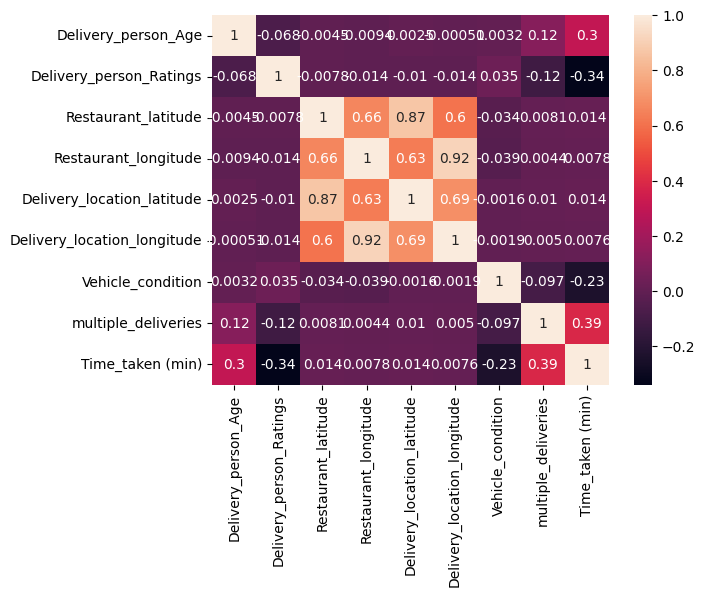

In [22]:
sns.heatmap(db1.corr(numeric_only=True),annot=True)

In [9]:
age=round(db1['Delivery_person_Age'].mean())
age

30

In [10]:
db1['Delivery_person_Age'].fillna(value=age,inplace = True)

In [11]:
db1.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [12]:
rating=db1['Delivery_person_Ratings'].median()
rating

4.7

In [13]:
db1['Delivery_person_Ratings'].fillna(value=rating,inplace=True)
db1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [14]:
db1.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [16]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          45584 non-null  float64
 3   Delivery_person_Ratings      45584 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [15]:
list1=[]

for i in range(len(db1)):
    x=geopy.distance.geodesic((db1['Restaurant_latitude'][i],db1['Restaurant_longitude'][i]),(db1['Delivery_location_latitude'][i],db1['Delivery_location_longitude'][i])).km
    list1.append(x)

In [16]:
db1.insert(4,'Delivery_distance(Km)',list1)
db1.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,30.327968,78.046106,30.397968,78.116106,12/2/2022,...,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [17]:
dropping=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']

db1.drop(columns=dropping,axis=1,inplace=True)

In [18]:
db1.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


<Axes: >

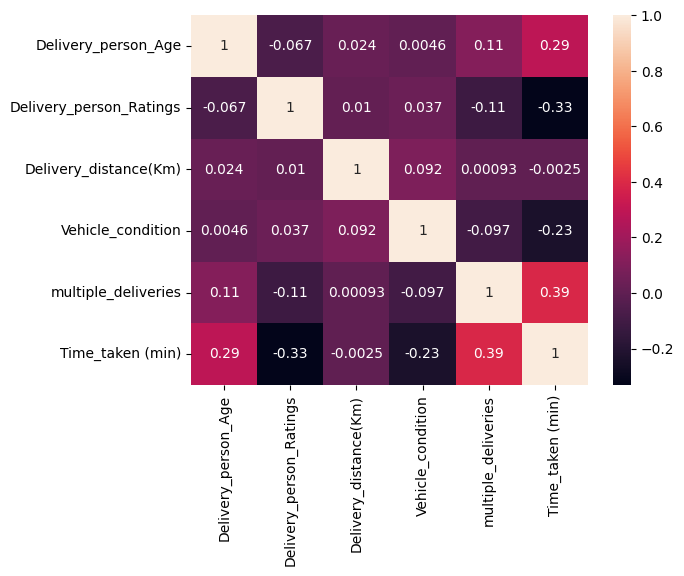

In [50]:
sns.heatmap(db1.corr(numeric_only=True),annot=True)

In [19]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       45584 non-null  object 
 1   Delivery_person_ID       45584 non-null  object 
 2   Delivery_person_Age      45584 non-null  float64
 3   Delivery_person_Ratings  45584 non-null  float64
 4   Delivery_distance(Km)    45584 non-null  float64
 5   Order_Date               45584 non-null  object 
 6   Time_Orderd              43853 non-null  object 
 7   Time_Order_picked        45584 non-null  object 
 8   Weather_conditions       44968 non-null  object 
 9   Road_traffic_density     44983 non-null  object 
 10  Vehicle_condition        45584 non-null  int64  
 11  Type_of_order            45584 non-null  object 
 12  Type_of_vehicle          45584 non-null  object 
 13  multiple_deliveries      44591 non-null  float64
 14  Festival              

In [20]:
db1['Order_Date']=pd.to_datetime(db1['Order_Date'],format='mixed',dayfirst=True)

In [21]:
db1['Order_Date'].dtype

dtype('<M8[ns]')

In [22]:
db1['Order_Date'].head()

0   2022-02-12
1   2022-02-13
2   2022-03-04
3   2022-02-13
4   2022-02-14
Name: Order_Date, dtype: datetime64[ns]

In [51]:
db1['Order_Date'].unique()

<DatetimeArray>
['2022-02-12 00:00:00', '2022-02-13 00:00:00', '2022-03-04 00:00:00',
 '2022-02-14 00:00:00', '2022-04-02 00:00:00', '2022-03-01 00:00:00',
 '2022-03-16 00:00:00', '2022-03-20 00:00:00', '2022-02-15 00:00:00',
 '2022-03-10 00:00:00', '2022-03-11 00:00:00', '2022-03-27 00:00:00',
 '2022-03-26 00:00:00', '2022-04-05 00:00:00', '2022-03-12 00:00:00',
 '2022-04-01 00:00:00', '2022-03-05 00:00:00', '2022-02-11 00:00:00',
 '2022-03-08 00:00:00', '2022-04-03 00:00:00', '2022-03-30 00:00:00',
 '2022-03-28 00:00:00', '2022-03-18 00:00:00', '2022-03-14 00:00:00',
 '2022-04-06 00:00:00', '2022-04-04 00:00:00', '2022-03-24 00:00:00',
 '2022-03-19 00:00:00', '2022-03-09 00:00:00', '2022-03-25 00:00:00',
 '2022-03-02 00:00:00', '2022-03-13 00:00:00', '2022-03-29 00:00:00',
 '2022-03-31 00:00:00', '2022-03-17 00:00:00', '2022-03-07 00:00:00',
 '2022-03-15 00:00:00', '2022-02-16 00:00:00', '2022-03-03 00:00:00',
 '2022-02-18 00:00:00', '2022-03-23 00:00:00', '2022-02-17 00:00:00',
 '20

In [27]:
db1.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,2022-02-13,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [23]:
db1_X=db1.iloc[:,:-1]

In [24]:
db1_Y=db1.iloc[:,-1]

In [30]:
db1_X.shape

(45584, 16)

In [31]:
db1_Y.shape

(45584,)

In [25]:
db1_X['Order_Date(year)']=db1_X['Order_Date'].dt.year
db1_X['Order_Date(month)']=db1_X['Order_Date'].dt.month
db1_X['Order_Date(day)']=db1_X['Order_Date'].dt.day

In [33]:
db1_X

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,2022-02-13,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,1.488112,2022-03-24,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,2022,3,24
45580,0xd641,AGRRES16DEL01,21.0,4.6,10.983242,2022-02-16,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,2022,2,16
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,4.648024,2022-03-11,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,2022,3,11
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,6.219668,2022-03-07,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,2022,3,7


In [26]:
db1_X.drop('Order_Date',axis=1,inplace=True)

In [63]:
db1_X.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13


In [68]:
Time_ordered_test=list(db1_X[db1_X['Time_Orderd'].isnull()]['Time_Orderd'].index)

In [69]:
Time_ordered_test

[33,
 65,
 111,
 131,
 170,
 222,
 241,
 280,
 296,
 322,
 339,
 345,
 381,
 401,
 416,
 417,
 422,
 490,
 498,
 509,
 525,
 574,
 587,
 596,
 601,
 610,
 647,
 657,
 718,
 739,
 753,
 759,
 791,
 847,
 873,
 887,
 961,
 964,
 979,
 1010,
 1023,
 1050,
 1070,
 1109,
 1126,
 1133,
 1148,
 1186,
 1251,
 1254,
 1274,
 1277,
 1369,
 1397,
 1400,
 1418,
 1442,
 1457,
 1490,
 1506,
 1522,
 1535,
 1543,
 1587,
 1590,
 1615,
 1660,
 1670,
 1672,
 1695,
 1720,
 1759,
 1760,
 1856,
 1861,
 1879,
 1943,
 1952,
 2016,
 2058,
 2079,
 2135,
 2171,
 2192,
 2196,
 2213,
 2224,
 2228,
 2247,
 2276,
 2311,
 2315,
 2340,
 2342,
 2373,
 2378,
 2445,
 2472,
 2475,
 2507,
 2523,
 2546,
 2564,
 2595,
 2663,
 2680,
 2682,
 2684,
 2688,
 2690,
 2693,
 2744,
 2757,
 2792,
 2823,
 2849,
 2857,
 2863,
 2868,
 2896,
 2942,
 3091,
 3092,
 3115,
 3140,
 3147,
 3244,
 3245,
 3257,
 3259,
 3265,
 3357,
 3381,
 3388,
 3406,
 3425,
 3434,
 3475,
 3486,
 3499,
 3501,
 3577,
 3607,
 3618,
 3650,
 3674,
 3691,
 3718,
 3738

In [27]:
db1_X['Time_Orderd_Upd']=db1_X['Time_Orderd']


In [28]:
db1_X['Time_Orderd_Upd'].head()

0    21:55
1    14:55
2    17:30
3     9:20
4    19:50
Name: Time_Orderd_Upd, dtype: object

In [29]:
Time_ordered_test=list(db1_X[db1_X['Time_Orderd'].isnull()]['Time_Orderd_Upd'].index)

In [30]:
for i in Time_ordered_test:
    db1_X['Time_Orderd_Upd'][i]=0

/tmp/ipykernel_1151/3614610400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1_X['Time_Orderd_Upd'][i]=0
/tmp/ipykernel_1151/3614610400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1_X['Time_Orderd_Upd'][i]=0
/tmp/ipykernel_1151/3614610400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1_X['Time_Orderd_Upd'][i]=0
/tmp/ipykernel_1151/3614610400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [31]:
db1_X[db1_X['Time_Orderd'].isnull()][['Time_Orderd','Time_Orderd_Upd']]

,Time_Orderd,Time_Orderd_Upd
33,NaN,0
65,NaN,0
111,NaN,0
131,NaN,0
170,NaN,0
...,...,...
45396,NaN,0
45495,NaN,0
45509,NaN,0
45510,NaN,0


In [32]:
db1_X.isnull().sum()

ID                            0
Delivery_person_ID            0
Delivery_person_Age           0
Delivery_person_Ratings       0
Delivery_distance(Km)         0
Time_Orderd                1731
Time_Order_picked             0
Weather_conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Order_Date(year)              0
Order_Date(month)             0
Order_Date(day)               0
Time_Orderd_Upd               0
dtype: int64

In [33]:
db1_X.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13,9:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14,19:50


In [34]:
db1_X.drop('Time_Orderd',axis=1,inplace=True)

In [92]:
db1_X.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13,9:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14,19:50


In [35]:
def Time_Ordered(times):    
    if ':' not in str(times):
        times = str(round(float(times)*24,00))
        times=times.replace('.',':')
        return times
    else:
        return times

In [110]:
Time_Ordered(0)

'0:0'

In [36]:
list2=[]

for i in range(len(db1_X)):
    x1=Time_Ordered(db1_X['Time_Orderd_Upd'][i])
    list2.append(x1)
    
db1_X.insert(6,'Time_ordered_sort',list2)

In [117]:
db1_X.head(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Order_picked,Time_ordered_sort,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,22:10,21:55,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,15:05,14:55,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:40,17:30,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:30,9:20,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13,9:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,20:05,19:50,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14,19:50
5,0x3af3,MUMRES15DEL03,29.0,4.5,13.740932,20:35,20:25,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,2022,4,2,20:25
6,0x3aab,MYSRES01DEL01,35.0,4.0,6.205590,15:10,14:55,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,2022,3,1,14:55
7,0x689b,PUNERES20DEL01,33.0,4.2,16.821192,20:40,20:30,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,2022,3,16,20:30
8,0x6f67,HYDRES14DEL01,34.0,4.9,10.738078,20:50,20:40,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,2022,3,20,20:40
9,0xc9cf,KOLRES15DEL03,21.0,4.7,4.533896,21:30,21:15,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,2022,2,15,21:15


In [118]:
db1_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       45584 non-null  object 
 1   Delivery_person_ID       45584 non-null  object 
 2   Delivery_person_Age      45584 non-null  float64
 3   Delivery_person_Ratings  45584 non-null  float64
 4   Delivery_distance(Km)    45584 non-null  float64
 5   Time_Order_picked        45584 non-null  object 
 6   Time_ordered_sort        45584 non-null  object 
 7   Weather_conditions       44968 non-null  object 
 8   Road_traffic_density     44983 non-null  object 
 9   Vehicle_condition        45584 non-null  int64  
 10  Type_of_order            45584 non-null  object 
 11  Type_of_vehicle          45584 non-null  object 
 12  multiple_deliveries      44591 non-null  float64
 13  Festival                 45356 non-null  object 
 14  City                  

In [37]:
list3=[]

for i in range(len(db1_X)):
    x3=Time_Ordered(db1_X['Time_Order_picked'][i])
    list3.append(x3)
    
db1_X.insert(7,'Time_OrderPicked_sort',list3)

In [45]:
db1_X.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Order_picked,Time_ordered_sort,Time_OrderPicked_sort,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,22:10,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,15:05,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:40,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:30,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13,9:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,20:05,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14,19:50


In [38]:
import datetime
import time

In [179]:
y=datetime.datetime.strptime('11:0','%H:%M').time()
y

datetime.time(11, 0)

In [180]:
type(y)

datetime.time

In [192]:
x=datetime.datetime.strptime('13:00:00','%H:%M:%S').time()
x

datetime.time(13, 0)

In [ ]:
##Order_Picked=db1_X['Time_OrderPicked_sort'].squeeze()

#for i in range(len(Order_Picked)):
#    if 
 #   c=datetime.datetime.strptime(Order_Picked[i],'%H:%M').time()
 #   print(c)

In [193]:
a='23:20'
a.split(':')

['23', '20']

In [39]:
db1_X[['Time_order_hour','Time_order_mins']]=db1_X.Time_ordered_sort.str.split(':',expand=True)

In [40]:
db1_X[['Time_picked_hour','Time_picked_mins','dumb_seconds']]=db1_X.Time_OrderPicked_sort.str.split(':',expand=True)

In [48]:
db1_X.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Order_picked,Time_ordered_sort,Time_OrderPicked_sort,Weather_conditions,Road_traffic_density,...,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd,Time_order_hour,Time_order_mins,Time_picked_hour,Time_picked_mins,dumb_seconds
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,22:10,21:55,22:10,Fog,Jam,...,Metropolitian,2022,2,12,21:55,21,55,22,10,None
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,15:05,14:55,15:05,Stormy,High,...,Metropolitian,2022,2,13,14:55,14,55,15,05,None
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:40,17:30,17:40,Sandstorms,Medium,...,Metropolitian,2022,3,4,17:30,17,30,17,40,None
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:30,9:20,9:30,Sandstorms,Low,...,Metropolitian,2022,2,13,9:20,9,20,9,30,None
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,20:05,19:50,20:05,Fog,Jam,...,Metropolitian,2022,2,14,19:50,19,50,20,05,None


In [200]:
db1_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       45584 non-null  object 
 1   Delivery_person_ID       45584 non-null  object 
 2   Delivery_person_Age      45584 non-null  float64
 3   Delivery_person_Ratings  45584 non-null  float64
 4   Delivery_distance(Km)    45584 non-null  float64
 5   Time_Order_picked        45584 non-null  object 
 6   Time_ordered_sort        45584 non-null  object 
 7   Time_OrderPicked_sort    45584 non-null  object 
 8   Weather_conditions       44968 non-null  object 
 9   Road_traffic_density     44983 non-null  object 
 10  Vehicle_condition        45584 non-null  int64  
 11  Type_of_order            45584 non-null  object 
 12  Type_of_vehicle          45584 non-null  object 
 13  multiple_deliveries      44591 non-null  float64
 14  Festival              

In [41]:
db1_X.drop('dumb_seconds',axis=1,inplace=True)

In [42]:
db1_X.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Delivery_distance(Km)', 'Time_Order_picked',
       'Time_ordered_sort', 'Time_OrderPicked_sort', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Order_Date(year)', 'Order_Date(month)', 'Order_Date(day)',
       'Time_Orderd_Upd', 'Time_order_hour', 'Time_order_mins',
       'Time_picked_hour', 'Time_picked_mins'],
      dtype='object')

In [43]:
int_columns = ['Time_order_hour', 'Time_order_mins','Time_picked_hour', 'Time_picked_mins']

for i in int_columns:
    db1_X[i]=db1_X[i].astype('int')

In [205]:
db1_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       45584 non-null  object 
 1   Delivery_person_ID       45584 non-null  object 
 2   Delivery_person_Age      45584 non-null  float64
 3   Delivery_person_Ratings  45584 non-null  float64
 4   Delivery_distance(Km)    45584 non-null  float64
 5   Time_Order_picked        45584 non-null  object 
 6   Time_ordered_sort        45584 non-null  object 
 7   Time_OrderPicked_sort    45584 non-null  object 
 8   Weather_conditions       44968 non-null  object 
 9   Road_traffic_density     44983 non-null  object 
 10  Vehicle_condition        45584 non-null  int64  
 11  Type_of_order            45584 non-null  object 
 12  Type_of_vehicle          45584 non-null  object 
 13  multiple_deliveries      44591 non-null  float64
 14  Festival              

In [44]:
list5=[]

for i in range(len(db1_X)):
    x5=db1_X['Time_order_hour'][i]*60+db1_X['Time_order_mins'][i]
    list5.append(x5)
    

In [45]:
list6=[]

for i in range(len(db1_X)):
    x6=db1_X['Time_picked_hour'][i]*60+db1_X['Time_picked_mins'][i]
    list6.append(x6)

In [46]:
db1_X.insert(8,'Time_Ordered(in mins)',list5)
db1_X.insert(9,'Time_order_picked(in mins)',list6)

In [212]:
db1_X.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Order_picked,Time_ordered_sort,Time_OrderPicked_sort,Time_Ordered(in mins),Time_order_picked(in mins),...,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd,Time_order_hour,Time_order_mins,Time_picked_hour,Time_picked_mins
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,22:10,21:55,22:10,1315,1330,...,No,Metropolitian,2022,2,12,21:55,21,55,22,10
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,15:05,14:55,15:05,895,905,...,No,Metropolitian,2022,2,13,14:55,14,55,15,5
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:40,17:30,17:40,1050,1060,...,No,Metropolitian,2022,3,4,17:30,17,30,17,40
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:30,9:20,9:30,560,570,...,No,Metropolitian,2022,2,13,9:20,9,20,9,30
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,20:05,19:50,20:05,1190,1205,...,No,Metropolitian,2022,2,14,19:50,19,50,20,5


In [47]:
list7=[]

for i in range(len(db1_X)):
    x7=db1_X['Time_order_picked(in mins)'][i]-db1_X['Time_Ordered(in mins)'][i]
    list7.append(x7)

In [48]:
 db1_X.insert(10,'Time_diff(order-picked)(in mins)',list7)

In [215]:
db1_X.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Order_picked,Time_ordered_sort,Time_OrderPicked_sort,Time_Ordered(in mins),Time_order_picked(in mins),...,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_Orderd_Upd,Time_order_hour,Time_order_mins,Time_picked_hour,Time_picked_mins
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,22:10,21:55,22:10,1315,1330,...,No,Metropolitian,2022,2,12,21:55,21,55,22,10
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,15:05,14:55,15:05,895,905,...,No,Metropolitian,2022,2,13,14:55,14,55,15,5
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,17:40,17:30,17:40,1050,1060,...,No,Metropolitian,2022,3,4,17:30,17,30,17,40
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,9:30,9:20,9:30,560,570,...,No,Metropolitian,2022,2,13,9:20,9,20,9,30
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,20:05,19:50,20:05,1190,1205,...,No,Metropolitian,2022,2,14,19:50,19,50,20,5


In [49]:
db1_X['Time_diff(order-picked)(in mins)']

0        15
1        10
2        10
3        10
4        15
         ..
45579    10
45580    15
45581    15
45582     5
45583     5
Name: Time_diff(order-picked)(in mins), Length: 45584, dtype: int64

In [58]:
db1_X.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Delivery_distance(Km)', 'Time_Order_picked',
       'Time_ordered_sort', 'Time_OrderPicked_sort', 'Time_Ordered(in mins)',
       'Time_order_picked(in mins)', 'Time_diff(order-picked)(in mins)',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Order_Date(year)', 'Order_Date(month)', 'Order_Date(day)',
       'Time_Orderd_Upd', 'Time_order_hour', 'Time_order_mins',
       'Time_picked_hour', 'Time_picked_mins'],
      dtype='object')

In [50]:
data_sort_db = db1_X.copy()

In [51]:
drop_columns=['Time_Order_picked','Time_ordered_sort', 'Time_OrderPicked_sort','Time_Orderd_Upd','Time_order_hour', 'Time_order_mins',
       'Time_picked_hour', 'Time_picked_mins']

In [52]:
db1_X.drop(drop_columns,axis=1,inplace=True)

In [222]:
db1_X.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Ordered(in mins),Time_order_picked(in mins),Time_diff(order-picked)(in mins),Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,1315,1330,15,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,895,905,10,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,1050,1060,10,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,560,570,10,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,1190,1205,15,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14


In [53]:
import matplotlib.pyplot as plt

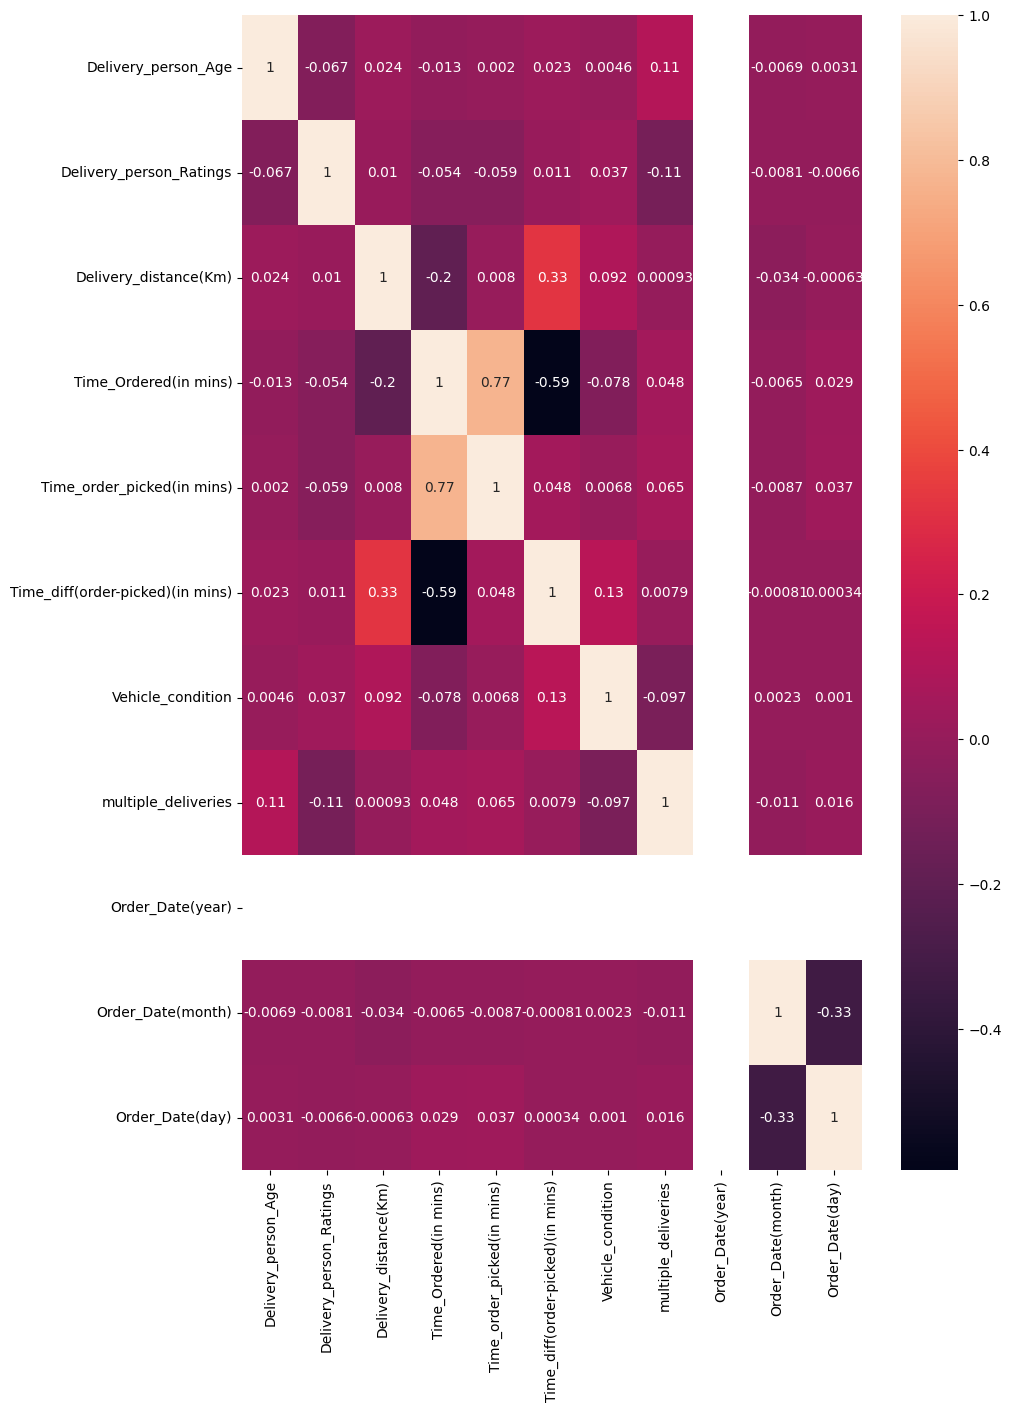

In [54]:
plt.figure(figsize=(10,15))
sns.heatmap(db1_X.corr(numeric_only=True),annot=True)
plt.show()

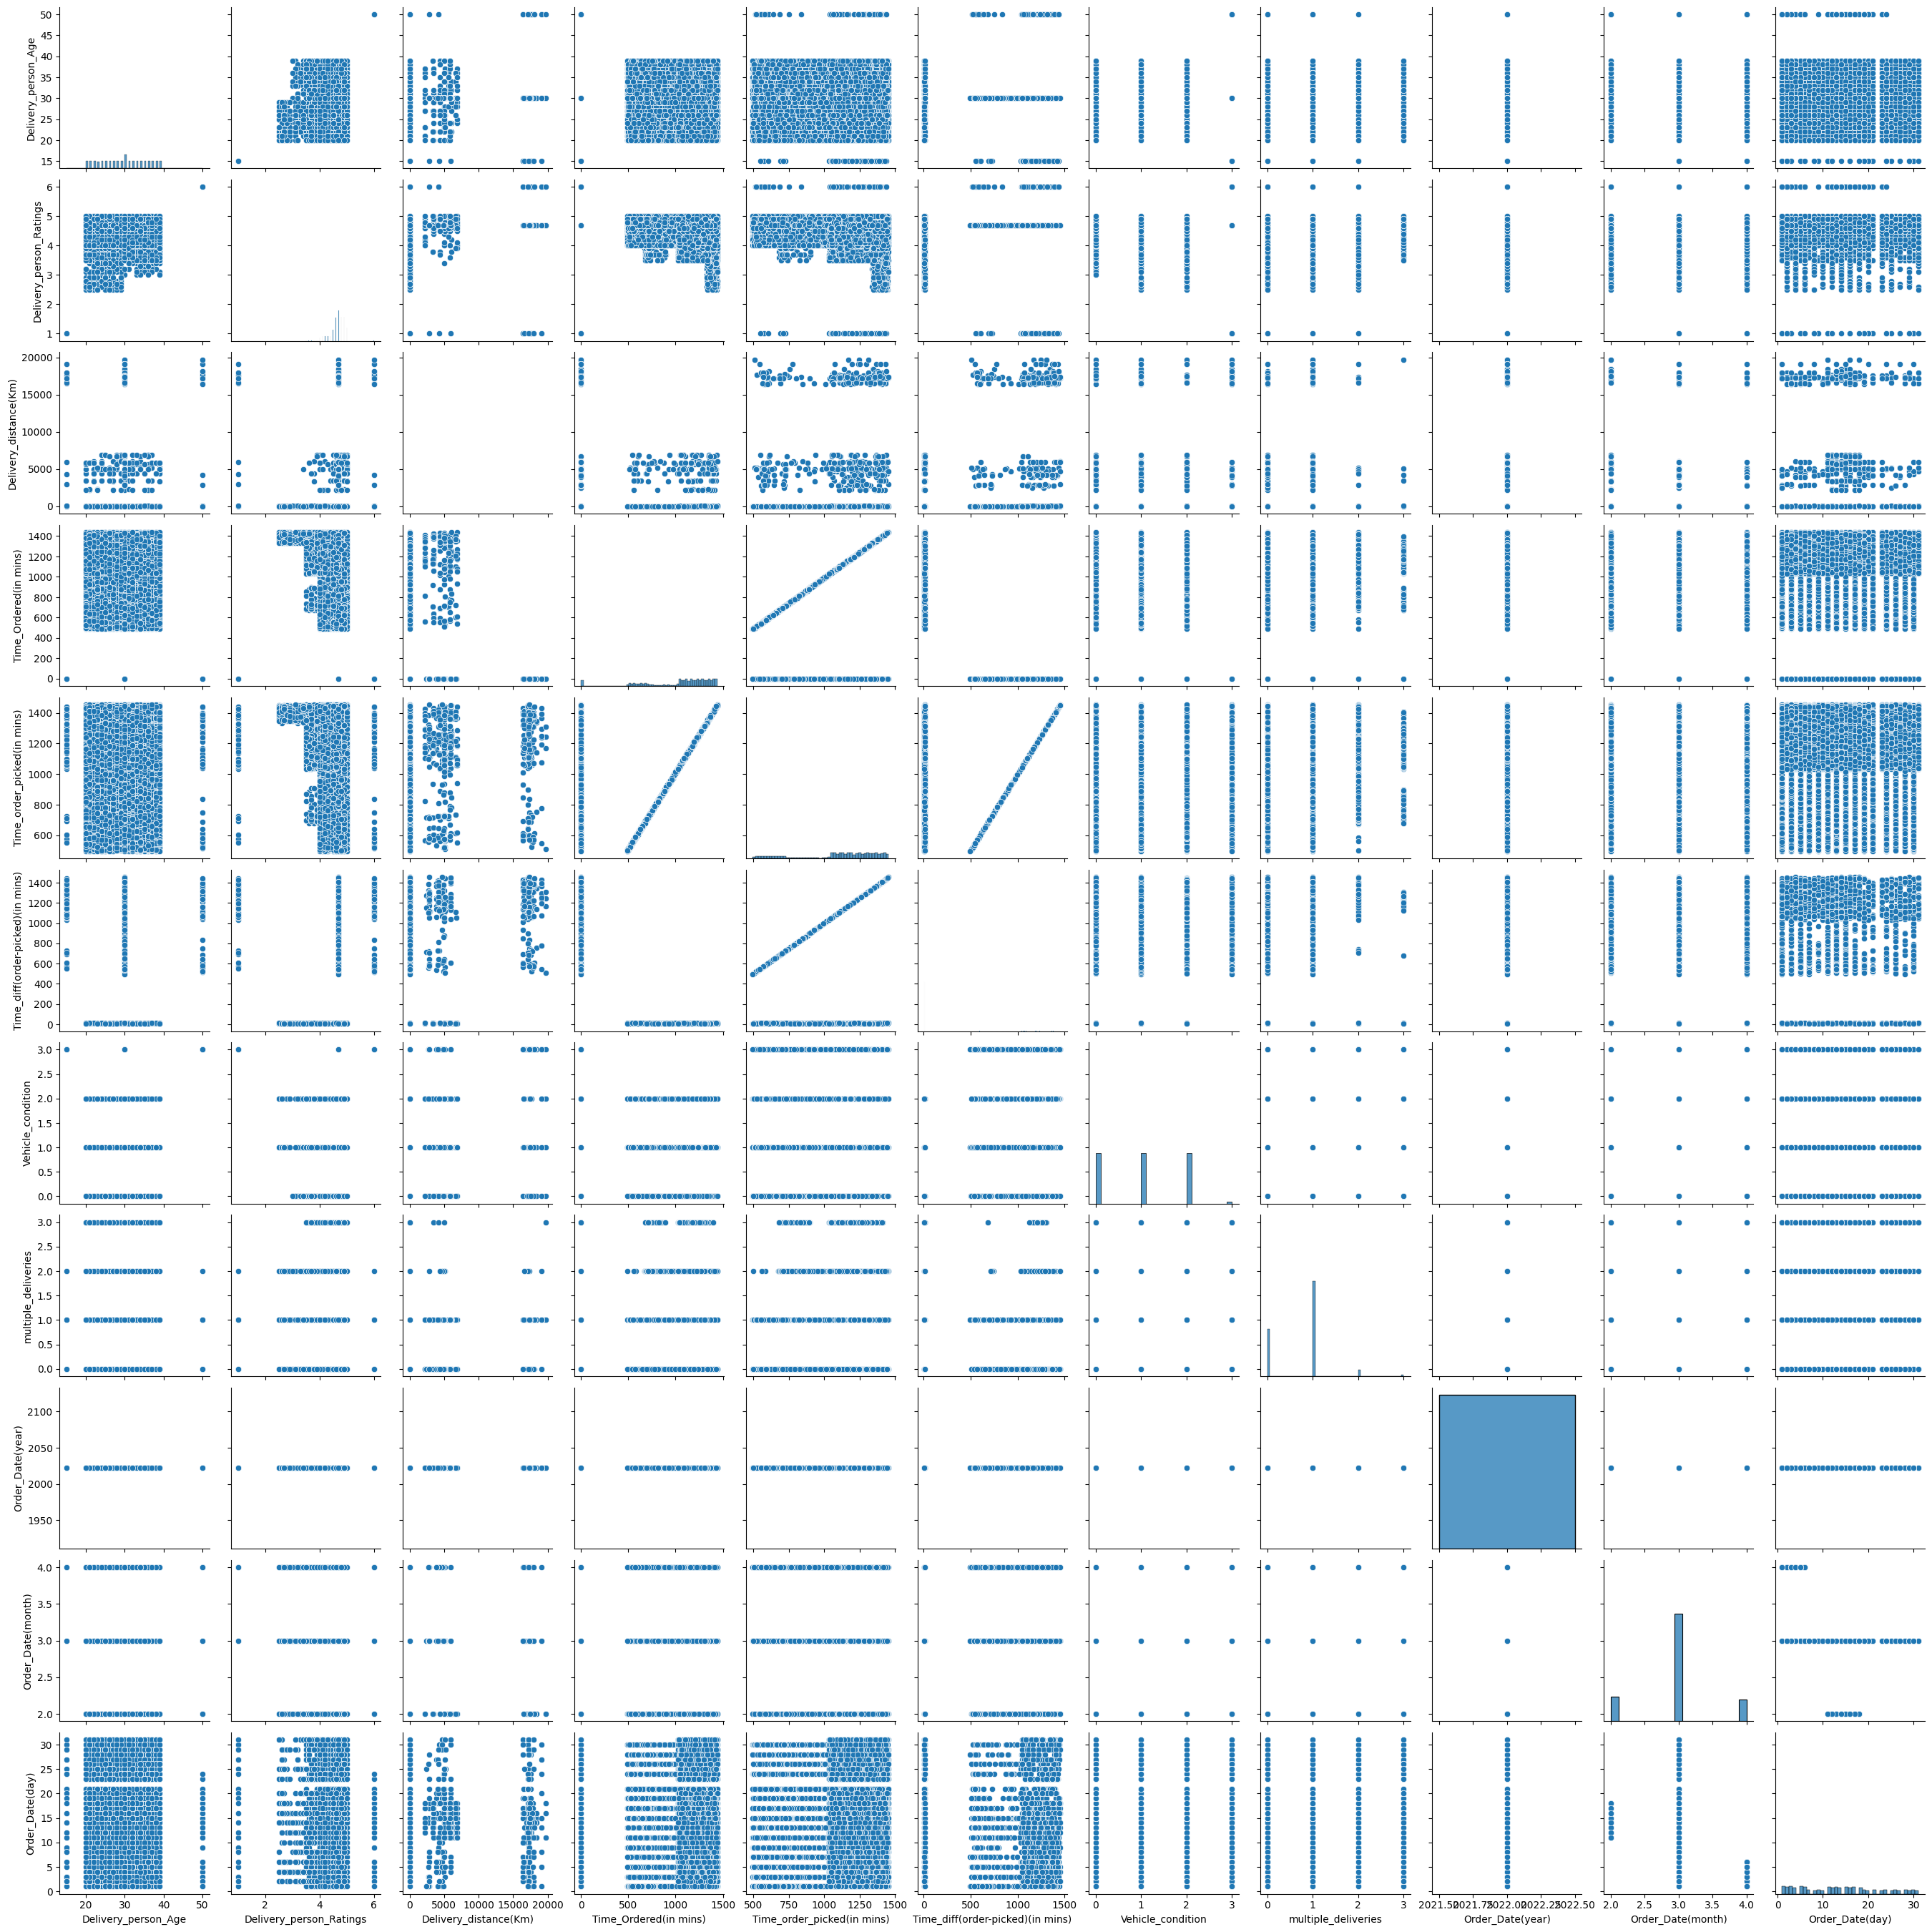

In [228]:
sns.pairplot(db1_X)

In [229]:
db1_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                45584 non-null  object 
 1   Delivery_person_ID                45584 non-null  object 
 2   Delivery_person_Age               45584 non-null  float64
 3   Delivery_person_Ratings           45584 non-null  float64
 4   Delivery_distance(Km)             45584 non-null  float64
 5   Time_Ordered(in mins)             45584 non-null  int64  
 6   Time_order_picked(in mins)        45584 non-null  int64  
 7   Time_diff(order-picked)(in mins)  45584 non-null  int64  
 8   Weather_conditions                44968 non-null  object 
 9   Road_traffic_density              44983 non-null  object 
 10  Vehicle_condition                 45584 non-null  int64  
 11  Type_of_order                     45584 non-null  object 
 12  Type

In [55]:
categorical_col = [feature for feature in db1_X.columns if db1_X[feature].dtype == 'O']
categorical_col

['ID',
 'Delivery_person_ID',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [56]:
numerical_col = [feature for feature in db1_X.columns if db1_X[feature].dtype != 'O']
numerical_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Delivery_distance(Km)',
 'Time_Ordered(in mins)',
 'Time_order_picked(in mins)',
 'Time_diff(order-picked)(in mins)',
 'Vehicle_condition',
 'multiple_deliveries',
 'Order_Date(year)',
 'Order_Date(month)',
 'Order_Date(day)']

In [57]:
db1_X[categorical_col].describe()

,ID,Delivery_person_ID,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,44968,44983,45584,45584,45356,44384
unique,45584,1320,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7653,15476,11530,26429,44460,34087


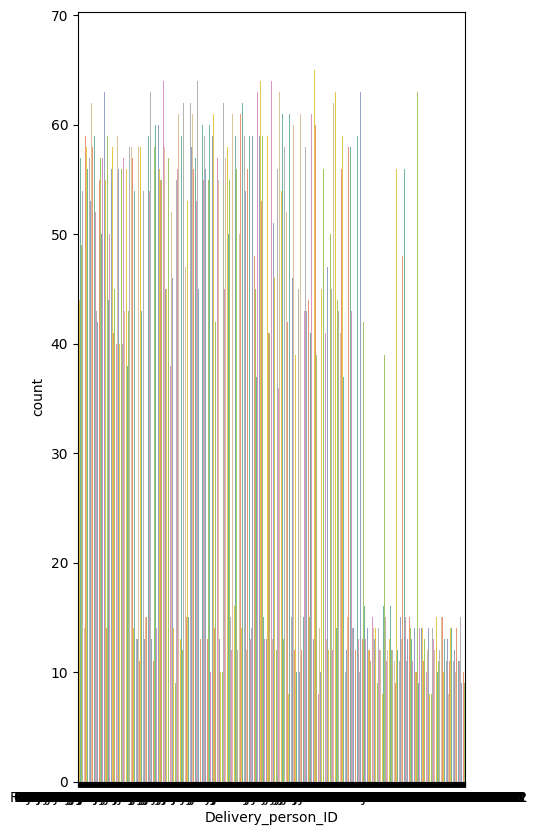

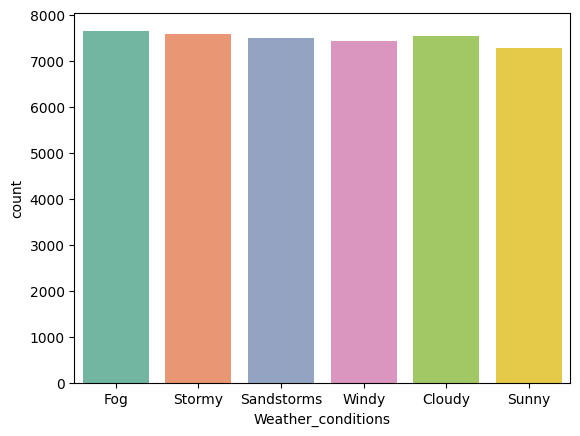

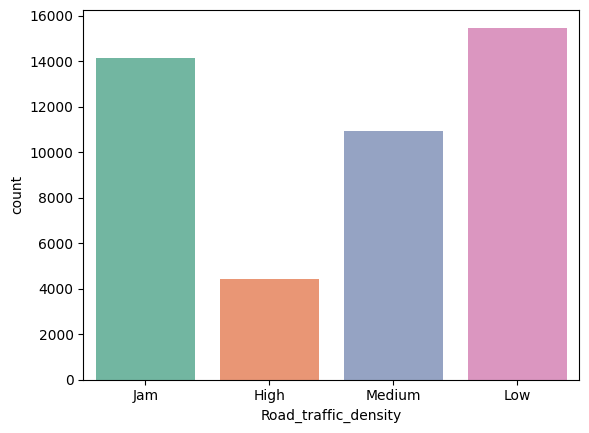

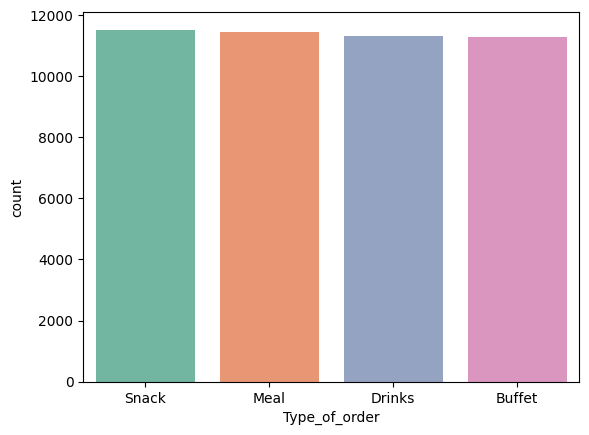

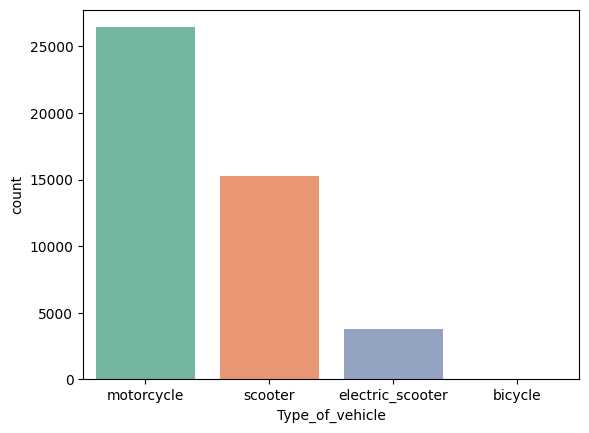

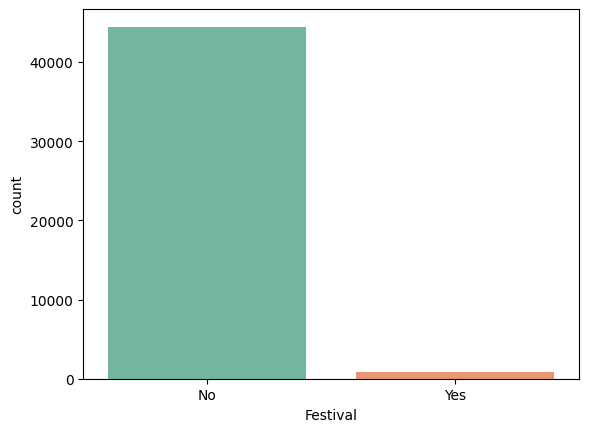

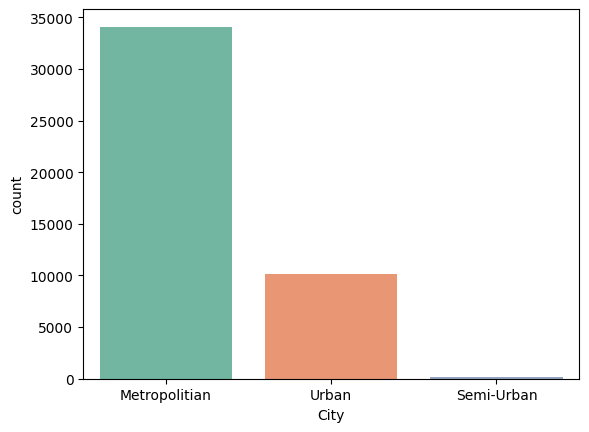

In [58]:
## categorical plot - countplot

cols=['Delivery_person_ID','Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']
plt.figure(figsize=(5,10))
x=1
for i in cols:
    sns.countplot(x=db1_X[i],palette='Set2')
    print('\n')
    plt.show()

In [59]:
db1_X['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan],
      dtype=object)

In [60]:
db1_X.isnull().sum()

ID                                     0
Delivery_person_ID                     0
Delivery_person_Age                    0
Delivery_person_Ratings                0
Delivery_distance(Km)                  0
Time_Ordered(in mins)                  0
Time_order_picked(in mins)             0
Time_diff(order-picked)(in mins)       0
Weather_conditions                   616
Road_traffic_density                 601
Vehicle_condition                      0
Type_of_order                          0
Type_of_vehicle                        0
multiple_deliveries                  993
Festival                             228
City                                1200
Order_Date(year)                       0
Order_Date(month)                      0
Order_Date(day)                        0
dtype: int64

In [62]:
food_data=pd.concat([db1_X,db1_Y])

In [64]:
db1_Y.head()

0    46
1    23
2    21
3    20
4    41
Name: Time_taken (min), dtype: int64

In [63]:
food_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Ordered(in mins),Time_order_picked(in mins),Time_diff(order-picked)(in mins),Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),0
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,1315.0,1330.0,15.0,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,2022.0,2.0,12.0,NaN
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,895.0,905.0,10.0,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,2022.0,2.0,13.0,NaN
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,1050.0,1060.0,10.0,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,2022.0,3.0,4.0,NaN
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,560.0,570.0,10.0,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,2022.0,2.0,13.0,NaN
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,1190.0,1205.0,15.0,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,2022.0,2.0,14.0,NaN


In [65]:
food_clean_data=pd.concat([db1_X,db1_Y],axis= 1)

In [66]:
food_clean_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_distance(Km),Time_Ordered(in mins),Time_order_picked(in mins),Time_diff(order-picked)(in mins),Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Date(year),Order_Date(month),Order_Date(day),Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.271464,1315,1330,15,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,2022,2,12,46
1,0xd987,KOCRES16DEL01,21.0,4.7,6.229376,895,905,10,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,2022,2,13,23
2,0x2784,PUNERES13DEL03,23.0,4.7,13.764306,1050,1060,10,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,2022,3,4,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.927795,560,570,10,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,2022,2,13,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.373484,1190,1205,15,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,2022,2,14,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,1.488112,695,705,10,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,2022,3,24,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,10.983242,1195,1210,15,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,2022,2,16,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,4.648024,1430,1445,15,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,2022,3,11,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,6.219668,815,820,5,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,2022,3,7,26


In [67]:
food_clean_data.drop('ID',axis=1,inplace=True)

In [68]:
food_clean_data.to_csv("clean_food_delivery_data.csv",index = False)